In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pprint
from boto.s3.connection import S3Connection


%matplotlib inline

# Limit rows disp# Limit rows displayed in notebook
pd.set_option('display.max_rows', 20)
pd.set_option('display.precision', 2)

In [3]:
import json

def readJson(filename):
    f = open(filename,'r')
    jsonList = f.readlines()
    f.close()
    return [json.loads(s) for s in jsonList]


business = readJson('yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')

In [12]:
f = open('locations.tsv', 'w')
count = 0
for i, biz in enumerate(business):
    if biz["city"] == "Phoenix":
        f.write("%s\t%f\t%f\n" % ( biz["city"], biz["latitude"], biz["longitude"]))
        count+=1
print count, " businesses written"
f.close()

8410  businesses written


In [16]:
X = []
Y = []

f = open('locations.tsv', 'r')
for line in f:
    business_id, latitude, longitude = line.rstrip().split('\t')
    Y.append(business_id)
    X.append([float(latitude), float(longitude)])
    
f.close()

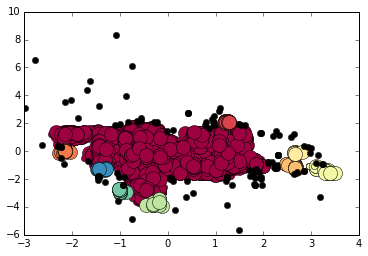

In [17]:
# https://en.wikipedia.org/wiki/DBSCAN

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import pylab as pl
import numpy as np

X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)
colors = pl.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
        markersize = 6
    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                            if labels[index] == k]
    
    #print class_members, cluster_core_samples
    
    for index in class_members:
        x = X[index]
        if index in core_samples and k != -1:
            markersize = 14
        else:
            markersize = 6
        pl.plot(x[0], x[1], 'o', markerfacecolor=col,
                markeredgecolor='k', markersize=markersize)

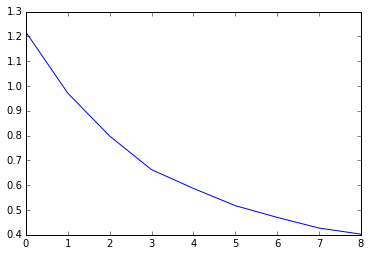

In [27]:
import numpy as np
from scipy import cluster
from matplotlib import pyplot

# Using the elbow method
initial = [cluster.vq.kmeans(X,i) for i in range(1,10)]
pyplot.plot([var for (cent,var) in initial])
pyplot.show()

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


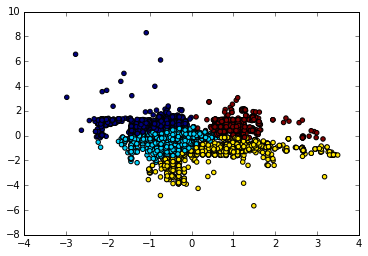

In [29]:
cent, var = initial[3]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(X,cent)
pyplot.scatter(X[:,0], X[:,1], c=assignment)
pyplot.show()